In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error

# Load Dataeset

In [2]:
X1, y1 = load_boston(return_X_y=True)


In [3]:
X=pd.DataFrame(X1)
y=pd.DataFrame(y1)

In [4]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']


In [5]:
X.columns=column_names


In [6]:
y.columns=['MEDV']

In [7]:
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [8]:
y

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


In [9]:
df=pd.concat([X,y],axis=1)
df.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [10]:
# import pandas_profiling
# df.profile_report()

In [11]:
df.shape

(506, 14)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
dtypes: float64(14)
memory usage: 55.5 KB


In [13]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


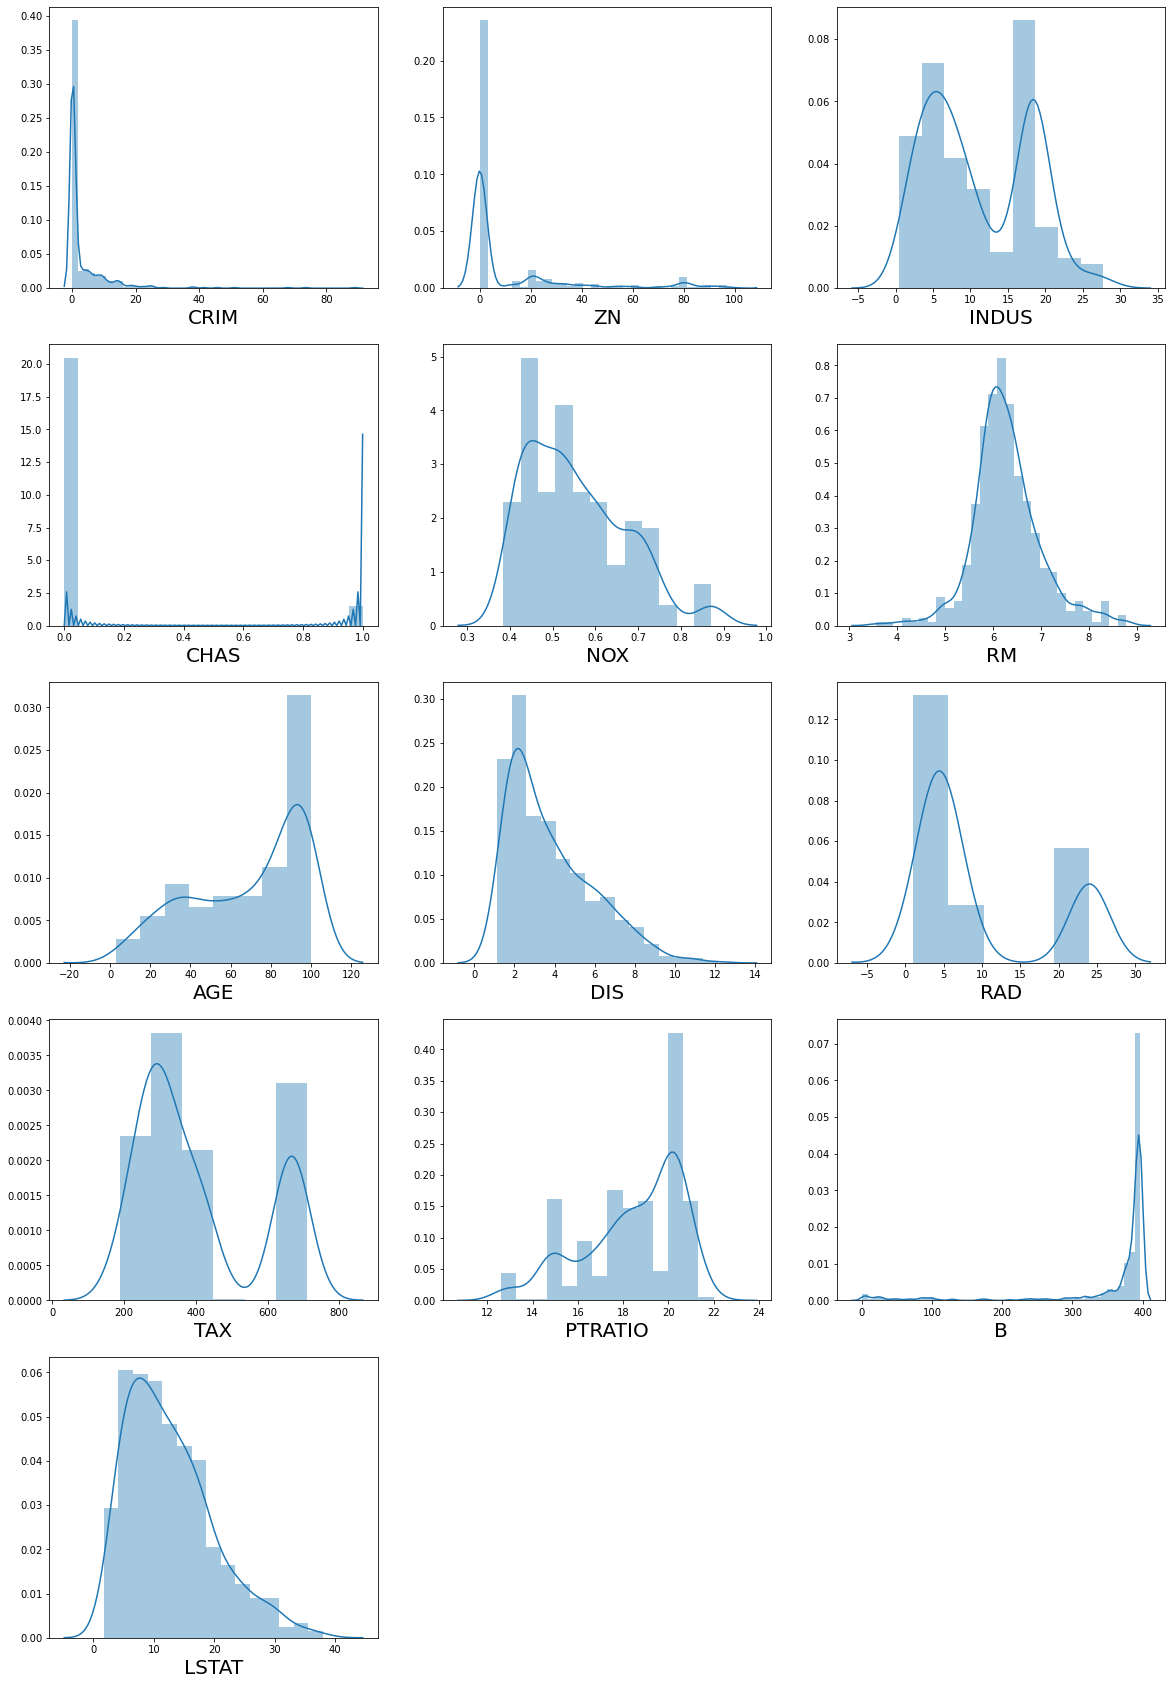

In [14]:
plt.figure(figsize=(20,30), facecolor='white')
plotnumber=1
for column in X:
    if plotnumber<=14:
        ax=plt.subplot(5,3,plotnumber)
        sns.distplot(X[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

In [15]:
print("total number of rows : {}".format(len(df)))
for k,v in df.items():
    print(f" print number of zeros in {k} is {len(v[v==0])}")

total number of rows : 506
 print number of zeros in CRIM is 0
 print number of zeros in ZN is 372
 print number of zeros in INDUS is 0
 print number of zeros in CHAS is 471
 print number of zeros in NOX is 0
 print number of zeros in RM is 0
 print number of zeros in AGE is 0
 print number of zeros in DIS is 0
 print number of zeros in RAD is 0
 print number of zeros in TAX is 0
 print number of zeros in PTRATIO is 0
 print number of zeros in B is 0
 print number of zeros in LSTAT is 0
 print number of zeros in MEDV is 0


# Detect outliers

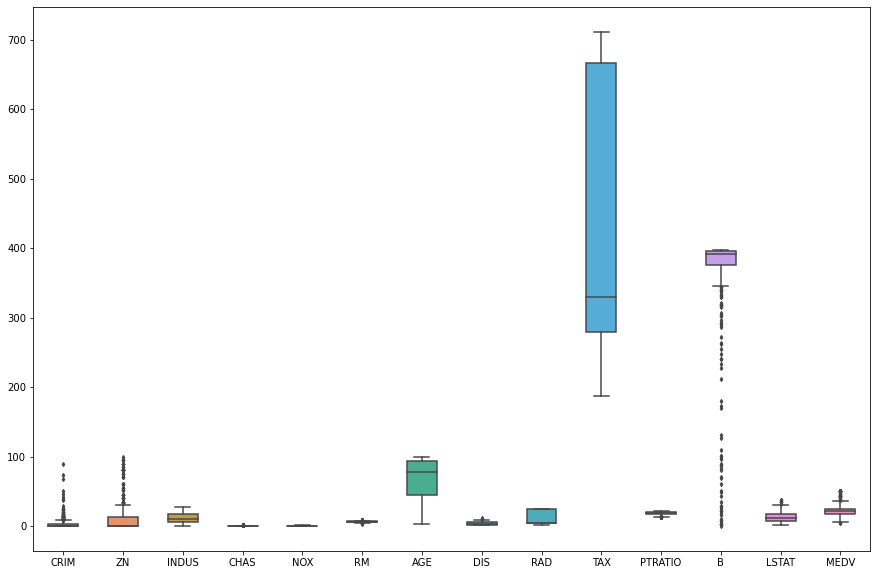

In [16]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=df, width= 0.5,ax=ax,  fliersize=3)


In [17]:
for k,v in X.items():
    q1=v.quantile(0.25)
    q3=v.quantile(0.75)
    iqr=q3-q1
    v_col=v[(v<=q1-iqr*1.5)|(v>=q3+iqr*1.5)]
    perc=len(v_col)*100/len(df)
    print(f"% of Outliers present in {k} is {perc}")

% of Outliers present in CRIM is 13.043478260869565
% of Outliers present in ZN is 13.438735177865613
% of Outliers present in INDUS is 0.0
% of Outliers present in CHAS is 100.0
% of Outliers present in NOX is 0.0
% of Outliers present in RM is 5.928853754940712
% of Outliers present in AGE is 0.0
% of Outliers present in DIS is 0.9881422924901185
% of Outliers present in RAD is 0.0
% of Outliers present in TAX is 0.0
% of Outliers present in PTRATIO is 2.964426877470356
% of Outliers present in B is 15.217391304347826
% of Outliers present in LSTAT is 1.383399209486166


# Remove ouliers

In [18]:
q=df['DIS'].quantile(0.98)
df=df[df['DIS']<=q]
q=df['PTRATIO'].quantile(0.98)
df=df[df['PTRATIO']<=q]
q=df['LSTAT'].quantile(0.98)
df=df[df['LSTAT']<=q]

In [19]:
q1=df['CRIM'].quantile(0.75)
q2=df['CRIM'].quantile(0.25)
iqr=q1-q2
upper=q1+1.5*iqr
lower=q2-1.5*iqr
lower

-5.07165375

In [20]:
out=np.where((df["CRIM"]>=upper))
df['CRIM'].iloc[out]=q1

In [21]:
q1=df['ZN'].quantile(0.75)
q2=df['ZN'].quantile(0.25)
iqr=q1-q2
upper=q1+1.5*iqr
lower=q2-1.5*iqr
out=np.where((df["ZN"]>=upper))
df['ZN'].iloc[out]=q1


In [22]:
q1=df['B'].quantile(0.75)
q2=df['B'].quantile(0.25)
iqr=q1-q2
upper=q1+1.5*iqr
lower=q2-1.5*iqr
out=np.where((df["B"]<=lower))
df['B'].iloc[out]=q2
out

(array([ 18,  25,  27,  32,  34,  99, 115, 131, 141, 142, 147, 148, 149,
        150, 151, 152, 156, 161, 163, 164, 165, 166, 354, 355, 382, 387,
        390, 391, 392, 393, 394, 395, 396, 397, 398, 399, 400, 401, 402,
        403, 404, 405, 406, 407, 408, 409, 410, 411, 412, 413, 414, 415,
        416, 417, 418, 424, 425, 426, 429, 430, 434, 435, 436, 437, 438,
        440, 445, 446, 447, 455, 469, 470], dtype=int64),)

In [23]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [24]:
for k,v in df.items():
    q1=v.quantile(0.25)
    q3=v.quantile(0.75)
    iqr=q3-q1
    v_col=v[(v<=q1-iqr*1.5)|(v>=q3+iqr*1.5)]
    perc=len(v_col)*100/len(df)
    print(f"% of Outliers present in {k} is {perc}")

% of Outliers present in CRIM is 0.0
% of Outliers present in ZN is 0.0
% of Outliers present in INDUS is 0.0
% of Outliers present in CHAS is 100.0
% of Outliers present in NOX is 0.0
% of Outliers present in RM is 5.349794238683128
% of Outliers present in AGE is 0.0
% of Outliers present in DIS is 0.0
% of Outliers present in RAD is 0.0
% of Outliers present in TAX is 0.0
% of Outliers present in PTRATIO is 0.0
% of Outliers present in B is 0.0
% of Outliers present in LSTAT is 0.0
% of Outliers present in MEDV is 8.23045267489712


In [25]:
X=df.drop(columns=['MEDV'])
y=df['MEDV']

In [26]:
type(X)

pandas.core.frame.DataFrame

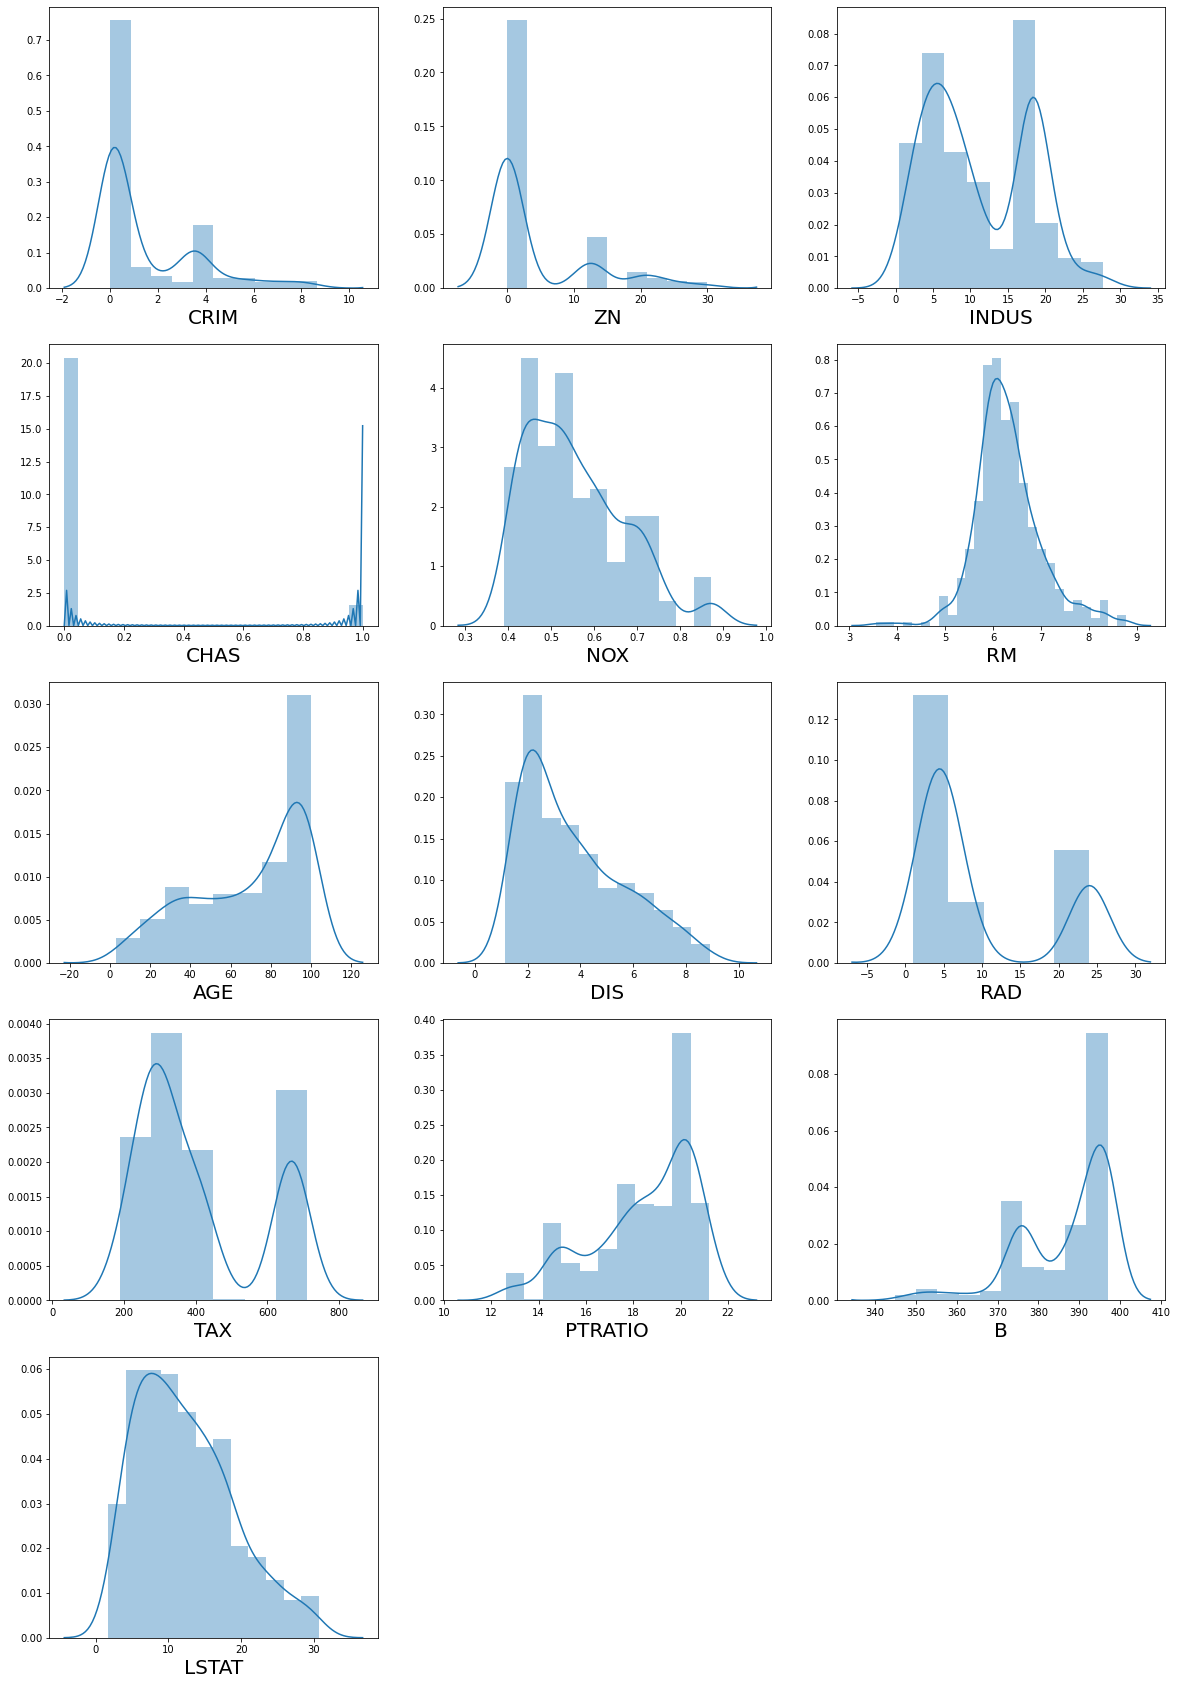

In [27]:
plt.figure(figsize=(20,30), facecolor='white')
plotnumber=1
for column in X:
    if plotnumber<=14:
        ax=plt.subplot(5,3,plotnumber)
        sns.distplot(X[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

In [28]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import statsmodels.api as sm 
from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LinearRegression

In [29]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


# Scaling features

In [30]:
sc=StandardScaler()
X_scaled=sc.fit_transform(X.copy())


# Detecting Correlation

In [31]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = X_scaled
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
vif["Features"] = X.columns

In [32]:
vif

,VIF,Features
0,5.372637,CRIM
1,1.839486,ZN
2,3.872979,INDUS
3,1.069342,CHAS
4,4.545598,NOX
5,1.757022,RM
6,3.009676,AGE
7,3.959564,DIS
8,10.010867,RAD
9,8.577809,TAX


In [33]:
type(X)

pandas.core.frame.DataFrame

In [34]:
X=X.drop(columns=['RAD'])

In [35]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,222.0,18.7,396.90,5.33


In [36]:
X_scaled=sc.fit_transform(X.copy())
variables = X_scaled
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
vif["Features"] = X.columns

In [37]:
vif

,VIF,Features
0,3.732144,CRIM
1,1.764309,ZN
2,3.543723,INDUS
3,1.063007,CHAS
4,4.544757,NOX
5,1.727495,RM
6,2.984377,AGE
7,3.875934,DIS
8,4.559744,TAX
9,1.729078,PTRATIO


In [38]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,222.0,18.7,396.90,5.33


In [39]:
df.drop(columns='RAD')

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,273.0,21.0,393.45,6.48,22.0


In [40]:
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.346408,0.629668,0.030637,0.669184,-0.195547,0.490276,-0.529373,0.879649,0.835646,0.366776,-0.310757,0.462234,-0.340792
ZN,-0.346408,1.000000,-0.501079,-0.042506,-0.451518,0.285007,-0.446726,0.586382,-0.293524,-0.380303,-0.406155,0.168643,-0.371745,0.318071
INDUS,0.629668,-0.501079,1.000000,0.062490,0.751890,-0.384971,0.628479,-0.701142,0.583206,0.717167,0.383550,-0.321174,0.606533,-0.482045
CHAS,0.030637,-0.042506,0.062490,1.000000,0.091541,0.084237,0.087247,-0.098318,-0.005140,-0.033450,-0.119297,-0.047702,-0.046183,0.172437
NOX,0.669184,-0.451518,0.751890,0.091541,1.000000,-0.292618,0.722825,-0.775059,0.596131,0.658963,0.179845,-0.316184,0.596769,-0.421793
RM,-0.195547,0.285007,-0.384971,0.084237,-0.292618,1.000000,-0.224876,0.202359,-0.174160,-0.260672,-0.342543,0.136207,-0.579072,0.688897
AGE,0.490276,-0.446726,0.628479,0.087247,0.722825,-0.224876,1.000000,-0.751849,0.438754,0.497794,0.260248,-0.222254,0.601431,-0.373981
DIS,-0.529373,0.586382,-0.701142,-0.098318,-0.775059,0.202359,-0.751849,1.000000,-0.487915,-0.541810,-0.247978,0.232505,-0.497792,0.255431
RAD,0.879649,-0.293524,0.583206,-0.005140,0.596131,-0.174160,0.438754,-0.487915,1.000000,0.908310,0.463428,-0.272977,0.465572,-0.366443
TAX,0.835646,-0.380303,0.717167,-0.033450,0.658963,-0.260672,0.497794,-0.541810,0.908310,1.000000,0.456733,-0.304226,0.532200,-0.454716


In [41]:
import statsmodels.formula.api as smf
lm = smf.ols(formula='MEDV ~ CRIM+ZN+INDUS+CHAS+NOX+RM+AGE+DIS+PTRATIO+B+LSTAT+TAX',data=df).fit()


In [42]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.742
Model:                            OLS   Adj. R-squared:                  0.736
Method:                 Least Squares   F-statistic:                     113.5
Date:                Fri, 14 Aug 2020   Prob (F-statistic):          8.11e-131
Time:                        10:26:04   Log-Likelihood:                -1438.3
No. Observations:                 486   AIC:                             2903.
Df Residuals:                     473   BIC:                             2957.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     56.7888      9.161      6.199      0.000      38.788      74.790
CRIM           0.5339      0.200      2.672      0.008       0.141       0.926
ZN             0.0361      0.036      1.010      0.313      -0.034       0.106
INDUS         -0.0280      0.059     -0.471      0.638      -0.145       0.089
CHAS           3.0193      0.856      3.528      0.000       1.338       4.701
NOX          -18.2070      3.988     -4.566      0.000     -26.043     -10.371
RM             4.1457      0.414     10.020      0.000       3.333       4.959
AGE           -0.0046      0.013     -0.348      0.728      -0.031       0.022
DIS           -1.4070      0.221     -6.372      0.000      -1.841      -0.973
PTRATIO       -0.8911      0.130     -6.866      0.000      -1.146      -0.636
B             -0.0470      0.021     -2.289      0.023      -0.087      -0.007
LSTAT         -0.6691      0.053    -12.621      0.000      -0.773      -0.565
TAX           -0.0063      0.003     -2.309      0.021      -0.012      -0.001
==============================================================================
Omnibus:                      135.184   Durbin-Watson:                   1.100
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              535.512
Skew:                           1.203   Prob(JB):                    5.19e-117
Kurtosis:                       7.545   Cond. No.                     2.50e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.5e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [43]:
lm = smf.ols(formula='MEDV ~ CRIM+CHAS+NOX+RM+DIS+PTRATIO+B+LSTAT+TAX',data=df).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.742
Model:                            OLS   Adj. R-squared:                  0.737
Method:                 Least Squares   F-statistic:                     151.7
Date:                Fri, 14 Aug 2020   Prob (F-statistic):          9.46e-134
Time:                        10:26:05   Log-Likelihood:                -1439.0
No. Observations:                 486   AIC:                             2898.
Df Residuals:                     476   BIC:                             2940.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     56.0568      9.096      6.163      0.000      38.184      73.930
CRIM           0.5463      0.199      2.748      0.006       0.156       0.937
CHAS           2.9392      0.850      3.458      0.001       1.269       4.609
NOX          -19.0020      3.760     -5.053      0.000     -26.391     -11.613
RM             4.2013      0.400     10.508      0.000       3.416       4.987
DIS           -1.2736      0.182     -6.998      0.000      -1.631      -0.916
PTRATIO       -0.9402      0.123     -7.656      0.000      -1.182      -0.699
B             -0.0446      0.020     -2.192      0.029      -0.085      -0.005
LSTAT         -0.6750      0.050    -13.569      0.000      -0.773      -0.577
TAX           -0.0066      0.003     -2.550      0.011      -0.012      -0.002
==============================================================================
Omnibus:                      136.720   Durbin-Watson:                   1.103
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              546.852
Skew:                           1.214   Prob(JB):                    1.79e-119
Kurtosis:                       7.595   Cond. No.                     2.47e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.47e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [44]:
#since they are highly correlated with target and also
X=df[['CRIM','RM','LSTAT','PTRATIO','NOX','CHAS','NOX','DIS','B','TAX']]

X.head()

,CRIM,RM,LSTAT,PTRATIO,NOX,CHAS,NOX,DIS,B,TAX
0,0.00632,6.575,4.98,15.3,0.538,0.0,0.538,4.0900,396.90,296.0
1,0.02731,6.421,9.14,17.8,0.469,0.0,0.469,4.9671,396.90,242.0
2,0.02729,7.185,4.03,17.8,0.469,0.0,0.469,4.9671,392.83,242.0
3,0.03237,6.998,2.94,18.7,0.458,0.0,0.458,6.0622,394.63,222.0
4,0.06905,7.147,5.33,18.7,0.458,0.0,0.458,6.0622,396.90,222.0


In [45]:
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 486, dtype: float64

In [46]:
X_scaled=sc.fit_transform(X)
X_scaled

array([[-0.70410154,  0.38365125, -1.12083683, ...,  0.20127221,
         0.89804463, -0.65906164],
       [-0.69398617,  0.15774358, -0.4863412 , ...,  0.65972236,
         0.89804463, -0.98153332],
       [-0.69399581,  1.27848032, -1.26573367, ...,  0.65972236,
         0.53997664, -0.98153332],
       ...,
       [-0.67786615,  0.97189135, -1.02017166, ..., -0.80359659,
         0.89804463, -0.79641069],
       [-0.6543343 ,  0.70490956, -0.89205235, ..., -0.68787333,
         0.59452262, -0.79641069],
       [-0.6842997 , -0.41582719, -0.67852016, ..., -0.62718919,
         0.89804463, -0.79641069]])

In [47]:
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.3,random_state=4)

In [48]:
result=pd.DataFrame(columns=['R_squared_train','R_squared_test','Adjusted_R_train','Adjusted_R_test','RMSSE_train','RMSSE_test'],index=['LinearRegression','Lasso','Ridge','ElasticNet','Polynomial','Lasso Polynomial','Ridge Polynomial','ElasticNet Polynomial'])
result

,R_squared_train,R_squared_test,Adjusted_R_train,Adjusted_R_test,RMSSE_train,RMSSE_test
LinearRegression,NaN,NaN,NaN,NaN,NaN,NaN
Lasso,NaN,NaN,NaN,NaN,NaN,NaN
Ridge,NaN,NaN,NaN,NaN,NaN,NaN
ElasticNet,NaN,NaN,NaN,NaN,NaN,NaN
Polynomial,NaN,NaN,NaN,NaN,NaN,NaN
Lasso Polynomial,NaN,NaN,NaN,NaN,NaN,NaN
Ridge Polynomial,NaN,NaN,NaN,NaN,NaN,NaN
ElasticNet Polynomial,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
regression = LinearRegression()

regression.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [50]:
a=mean_squared_error(y_train, regression.predict(X_train))
a

22.05673422396007

In [51]:
def adj_r2(x,y):
    r2 = regression.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

In [52]:
regression.score(X_train,y_train)
result.loc['LinearRegression']['R_squared_train']=regression.score(X_train,y_train)
result.loc['LinearRegression']['R_squared_test']=regression.score(X_test,y_test)
result.loc['LinearRegression']['Adjusted_R_train']=adj_r2(X_train,y_train)
result.loc['LinearRegression']['Adjusted_R_test']=adj_r2(X_test,y_test)
result.loc['LinearRegression']['RMSSE_train']=mean_squared_error(y_train, regression.predict(X_train))**0.5
result.loc['LinearRegression']['RMSSE_test']=mean_squared_error(y_test, regression.predict(X_test))**0.5

In [53]:
result

,R_squared_train,R_squared_test,Adjusted_R_train,Adjusted_R_test,RMSSE_train,RMSSE_test
LinearRegression,0.719637,0.768028,0.711115,0.750845,4.69646,4.77028
Lasso,NaN,NaN,NaN,NaN,NaN,NaN
Ridge,NaN,NaN,NaN,NaN,NaN,NaN
ElasticNet,NaN,NaN,NaN,NaN,NaN,NaN
Polynomial,NaN,NaN,NaN,NaN,NaN,NaN
Lasso Polynomial,NaN,NaN,NaN,NaN,NaN,NaN
Ridge Polynomial,NaN,NaN,NaN,NaN,NaN,NaN
ElasticNet Polynomial,NaN,NaN,NaN,NaN,NaN,NaN


In [54]:
alpha = np.random.uniform(low=0, high=10, size=(50,))
alpha

array([6.6336443 , 9.1146024 , 4.78751035, 6.89262424, 9.59984728,
       9.63637978, 2.53963824, 9.03704232, 4.36263377, 1.70612733,
       9.0616491 , 5.81041547, 0.34415253, 6.69873144, 5.14509565,
       1.66025511, 3.84723195, 2.22110229, 4.29739675, 0.74491073,
       8.48288935, 7.84618188, 8.85827302, 2.74978103, 5.82474385,
       2.49499604, 8.02976105, 2.16565155, 9.88865606, 7.47173899,
       8.79050905, 3.97542228, 1.9010756 , 4.81847282, 5.7927062 ,
       0.67544307, 3.56456447, 0.74039984, 3.65609837, 8.68028306,
       9.13515632, 1.77097889, 1.9600613 , 0.93135551, 6.9204476 ,
       8.77774125, 1.27623113, 1.89530239, 4.45949346, 6.58127822])

In [55]:
lasscv = LassoCV(alphas = alpha,cv =10)
lasscv.fit(X_train, y_train)

LassoCV(alphas=array([6.6336443 , 9.1146024 , 4.78751035, 6.89262424, 9.59984728,
       9.63637978, 2.53963824, 9.03704232, 4.36263377, 1.70612733,
       9.0616491 , 5.81041547, 0.34415253, 6.69873144, 5.14509565,
       1.66025511, 3.84723195, 2.22110229, 4.29739675, 0.74491073,
       8.48288935, 7.84618188, 8.85827302, 2.74978103, 5.82474385,
       2.49499604, 8.02976105, 2.16565155, 9.88865606, 7.47173899,
       8...
       0.67544307, 3.56456447, 0.74039984, 3.65609837, 8.68028306,
       9.13515632, 1.77097889, 1.9600613 , 0.93135551, 6.9204476 ,
       8.77774125, 1.27623113, 1.89530239, 4.45949346, 6.58127822]),
        copy_X=True, cv=10, eps=0.001, fit_intercept=True, max_iter=1000,
        n_alphas=100, n_jobs=None, normalize=False, positive=False,
        precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
        verbose=False)

In [56]:
a=lasscv.alpha_
a

0.34415253417156233

In [57]:
lasscv = Lasso(alpha=a)
lasscv.fit(X_train, y_train)

Lasso(alpha=0.34415253417156233, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [58]:
def adj_r2(x,y):
    r2 = lasscv.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

In [59]:
result.loc['Lasso']['R_squared_train']=lasscv.score(X_train,y_train)
result.loc['Lasso']['R_squared_test']=lasscv.score(X_test,y_test)
result.loc['Lasso']['Adjusted_R_train']=adj_r2(X_train,y_train)
result.loc['Lasso']['Adjusted_R_test']=adj_r2(X_test,y_test)
result.loc['Lasso']['RMSSE_train']=mean_squared_error(y_train, lasscv.predict(X_train))**0.5
result.loc['Lasso']['RMSSE_test']=mean_squared_error(y_test, lasscv.predict(X_test))**0.5

In [60]:
result

,R_squared_train,R_squared_test,Adjusted_R_train,Adjusted_R_test,RMSSE_train,RMSSE_test
LinearRegression,0.719637,0.768028,0.711115,0.750845,4.69646,4.77028
Lasso,0.691248,0.750375,0.681863,0.731884,4.9285,4.94846
Ridge,NaN,NaN,NaN,NaN,NaN,NaN
ElasticNet,NaN,NaN,NaN,NaN,NaN,NaN
Polynomial,NaN,NaN,NaN,NaN,NaN,NaN
Lasso Polynomial,NaN,NaN,NaN,NaN,NaN,NaN
Ridge Polynomial,NaN,NaN,NaN,NaN,NaN,NaN
ElasticNet Polynomial,NaN,NaN,NaN,NaN,NaN,NaN


In [61]:
ridgecv = RidgeCV(alphas = alpha,cv=10)
ridgecv.fit(X_train, y_train)

RidgeCV(alphas=array([6.6336443 , 9.1146024 , 4.78751035, 6.89262424, 9.59984728,
       9.63637978, 2.53963824, 9.03704232, 4.36263377, 1.70612733,
       9.0616491 , 5.81041547, 0.34415253, 6.69873144, 5.14509565,
       1.66025511, 3.84723195, 2.22110229, 4.29739675, 0.74491073,
       8.48288935, 7.84618188, 8.85827302, 2.74978103, 5.82474385,
       2.49499604, 8.02976105, 2.16565155, 9.88865606, 7.47173899,
       8.79050905, 3.97542228, 1.9010756 , 4.81847282, 5.7927062 ,
       0.67544307, 3.56456447, 0.74039984, 3.65609837, 8.68028306,
       9.13515632, 1.77097889, 1.9600613 , 0.93135551, 6.9204476 ,
       8.77774125, 1.27623113, 1.89530239, 4.45949346, 6.58127822]),
        cv=10, fit_intercept=True, gcv_mode=None, normalize=False, scoring=None,
        store_cv_values=False)

In [62]:
a=ridgecv.alpha_
a

9.888656060135325

In [63]:
ridgecv=Ridge(alpha=a)
ridgecv.fit(X_train,y_train)

Ridge(alpha=9.888656060135325, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [64]:
def adj_r2(X,y):
    r2=ridgecv.score(X,y)
    n=X.shape[0]
    p=X.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

In [65]:
result.loc['Ridge']['R_squared_train']=ridgecv.score(X_train,y_train)
result.loc['Ridge']['R_squared_test']=ridgecv.score(X_test,y_test)
result.loc['Ridge']['Adjusted_R_train']=adj_r2(X_train,y_train)
result.loc['Ridge']['Adjusted_R_test']=adj_r2(X_test,y_test)
result.loc['Ridge']['RMSSE_train']=mean_squared_error(y_train, ridgecv.predict(X_train))**0.5
result.loc['Ridge']['RMSSE_test']=mean_squared_error(y_test, ridgecv.predict(X_test))**0.5

In [66]:
elasticCV = ElasticNetCV(alphas = alpha, cv =10)

elasticCV.fit(X_train, y_train)

ElasticNetCV(alphas=array([6.6336443 , 9.1146024 , 4.78751035, 6.89262424, 9.59984728,
       9.63637978, 2.53963824, 9.03704232, 4.36263377, 1.70612733,
       9.0616491 , 5.81041547, 0.34415253, 6.69873144, 5.14509565,
       1.66025511, 3.84723195, 2.22110229, 4.29739675, 0.74491073,
       8.48288935, 7.84618188, 8.85827302, 2.74978103, 5.82474385,
       2.49499604, 8.02976105, 2.16565155, 9.88865606, 7.47173...
       0.67544307, 3.56456447, 0.74039984, 3.65609837, 8.68028306,
       9.13515632, 1.77097889, 1.9600613 , 0.93135551, 6.9204476 ,
       8.77774125, 1.27623113, 1.89530239, 4.45949346, 6.58127822]),
             copy_X=True, cv=10, eps=0.001, fit_intercept=True, l1_ratio=0.5,
             max_iter=1000, n_alphas=100, n_jobs=None, normalize=False,
             positive=False, precompute='auto', random_state=None,
             selection='cyclic', tol=0.0001, verbose=0)

In [67]:
a=elasticCV.alpha_
a

0.34415253417156233

In [68]:
elasticnet_reg=ElasticNet(alpha =a,l1_ratio=0.5)
elasticnet_reg.fit(X_train, y_train)

ElasticNet(alpha=0.34415253417156233, copy_X=True, fit_intercept=True,
           l1_ratio=0.5, max_iter=1000, normalize=False, positive=False,
           precompute=False, random_state=None, selection='cyclic', tol=0.0001,
           warm_start=False)

In [69]:
def adj_r2(X,y):
    r2=elasticnet_reg.score(X,y)
    n=X.shape[0]
    p=X.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

In [70]:
result.loc['ElasticNet']['R_squared_train']=elasticnet_reg.score(X_train,y_train)
result.loc['ElasticNet']['R_squared_test']=elasticnet_reg.score(X_test,y_test)
result.loc['ElasticNet']['Adjusted_R_train']=adj_r2(X_train,y_train)
result.loc['ElasticNet']['Adjusted_R_test']=adj_r2(X_test,y_test)
result.loc['ElasticNet']['RMSSE_train']=mean_squared_error(y_train, elasticnet_reg.predict(X_train))**0.5
result.loc['ElasticNet']['RMSSE_test']=mean_squared_error(y_test, elasticnet_reg.predict(X_test))**0.5

In [71]:
result

,R_squared_train,R_squared_test,Adjusted_R_train,Adjusted_R_test,RMSSE_train,RMSSE_test
LinearRegression,0.719637,0.768028,0.711115,0.750845,4.69646,4.77028
Lasso,0.691248,0.750375,0.681863,0.731884,4.9285,4.94846
Ridge,0.718774,0.76972,0.710226,0.752662,4.70368,4.75285
ElasticNet,0.688237,0.745294,0.678761,0.726426,4.95247,4.99857
Polynomial,NaN,NaN,NaN,NaN,NaN,NaN
Lasso Polynomial,NaN,NaN,NaN,NaN,NaN,NaN
Ridge Polynomial,NaN,NaN,NaN,NaN,NaN,NaN
ElasticNet Polynomial,NaN,NaN,NaN,NaN,NaN,NaN


In [72]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)  #trying to create a 2 degree polynomial equation. It simply squares the x as shown in the output
X_poly = poly_reg.fit_transform(X_train)

In [73]:
lr=LinearRegression()
lr.fit(X_poly,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [74]:
def adj_r2(X,y):
    r2=lr.score(X,y)
    n=X.shape[0]
    p=X.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

In [75]:
result.loc['Polynomial']['R_squared_train']=lr.score(X_poly,y_train)
result.loc['Polynomial']['R_squared_test']=lr.score(poly_reg.transform(X_test),y_test)
result.loc['Polynomial']['Adjusted_R_train']=adj_r2(X_poly,y_train)
result.loc['Polynomial']['Adjusted_R_test']=adj_r2(poly_reg.transform(X_test),y_test)
result.loc['Polynomial']['RMSSE_train']=mean_squared_error(y_train, lr.predict(X_poly))**0.5
result.loc['Polynomial']['RMSSE_test']=mean_squared_error(y_test, lr.predict(poly_reg.transform(X_test)))**0.5


In [76]:
ridgecv = RidgeCV(alphas = alpha,cv=10)
ridgecv.fit(X_poly, y_train)

RidgeCV(alphas=array([6.6336443 , 9.1146024 , 4.78751035, 6.89262424, 9.59984728,
       9.63637978, 2.53963824, 9.03704232, 4.36263377, 1.70612733,
       9.0616491 , 5.81041547, 0.34415253, 6.69873144, 5.14509565,
       1.66025511, 3.84723195, 2.22110229, 4.29739675, 0.74491073,
       8.48288935, 7.84618188, 8.85827302, 2.74978103, 5.82474385,
       2.49499604, 8.02976105, 2.16565155, 9.88865606, 7.47173899,
       8.79050905, 3.97542228, 1.9010756 , 4.81847282, 5.7927062 ,
       0.67544307, 3.56456447, 0.74039984, 3.65609837, 8.68028306,
       9.13515632, 1.77097889, 1.9600613 , 0.93135551, 6.9204476 ,
       8.77774125, 1.27623113, 1.89530239, 4.45949346, 6.58127822]),
        cv=10, fit_intercept=True, gcv_mode=None, normalize=False, scoring=None,
        store_cv_values=False)

In [77]:
ridgecv.alpha_

9.888656060135325

In [78]:
ridgecv=Ridge(alpha=9.849227540019228)
ridgecv.fit(X_poly,y_train)

Ridge(alpha=9.849227540019228, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [79]:
def adj_r2(X,y):
    r2=ridgecv.score(X,y)
    n=X.shape[0]
    p=X.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

In [80]:
result.loc['Ridge Polynomial']['R_squared_train']=ridgecv.score(X_poly,y_train)
result.loc['Ridge Polynomial']['R_squared_test']=ridgecv.score(poly_reg.transform(X_test),y_test)
result.loc['Ridge Polynomial']['Adjusted_R_train']=adj_r2(X_poly,y_train)
result.loc['Ridge Polynomial']['Adjusted_R_test']=adj_r2(poly_reg.transform(X_test),y_test)
result.loc['Ridge Polynomial']['RMSSE_train']=mean_squared_error(y_train, ridgecv.predict(X_poly))**0.5
result.loc['Ridge Polynomial']['RMSSE_test']=mean_squared_error(y_test, ridgecv.predict(poly_reg.transform(X_test)))**0.5

In [81]:
lassocv=LassoCV(alphas=alpha,cv=10)
lassocv.fit(X_poly,y_train)

LassoCV(alphas=array([6.6336443 , 9.1146024 , 4.78751035, 6.89262424, 9.59984728,
       9.63637978, 2.53963824, 9.03704232, 4.36263377, 1.70612733,
       9.0616491 , 5.81041547, 0.34415253, 6.69873144, 5.14509565,
       1.66025511, 3.84723195, 2.22110229, 4.29739675, 0.74491073,
       8.48288935, 7.84618188, 8.85827302, 2.74978103, 5.82474385,
       2.49499604, 8.02976105, 2.16565155, 9.88865606, 7.47173899,
       8...
       0.67544307, 3.56456447, 0.74039984, 3.65609837, 8.68028306,
       9.13515632, 1.77097889, 1.9600613 , 0.93135551, 6.9204476 ,
       8.77774125, 1.27623113, 1.89530239, 4.45949346, 6.58127822]),
        copy_X=True, cv=10, eps=0.001, fit_intercept=True, max_iter=1000,
        n_alphas=100, n_jobs=None, normalize=False, positive=False,
        precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
        verbose=False)

In [82]:
lassocv.alpha_

0.34415253417156233

In [83]:
lassocv=Lasso(alpha=0.02031418713747901)
lassocv.fit(X_poly,y_train)

Lasso(alpha=0.02031418713747901, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [84]:
def adj_r2(X,y):
    r2=lassocv.score(X,y)
    n=X.shape[0]
    p=X.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

In [85]:
result.loc['Lasso Polynomial']['R_squared_train']=lassocv.score(X_poly,y_train)
result.loc['Lasso Polynomial']['R_squared_test']=lassocv.score(poly_reg.transform(X_test),y_test)
result.loc['Lasso Polynomial']['Adjusted_R_train']=adj_r2(X_poly,y_train)
result.loc['Lasso Polynomial']['Adjusted_R_test']=adj_r2(poly_reg.transform(X_test),y_test)
result.loc['Lasso Polynomial']['RMSSE_train']=mean_squared_error(y_train, lassocv.predict(X_poly))**0.5
result.loc['Lasso Polynomial']['RMSSE_test']=mean_squared_error(y_test, lassocv.predict(poly_reg.transform(X_test)))**0.5

In [86]:
elasticCV = ElasticNetCV(alphas = alpha, cv =10)

elasticCV.fit(poly_reg.fit_transform(X_train), y_train)

ElasticNetCV(alphas=array([6.6336443 , 9.1146024 , 4.78751035, 6.89262424, 9.59984728,
       9.63637978, 2.53963824, 9.03704232, 4.36263377, 1.70612733,
       9.0616491 , 5.81041547, 0.34415253, 6.69873144, 5.14509565,
       1.66025511, 3.84723195, 2.22110229, 4.29739675, 0.74491073,
       8.48288935, 7.84618188, 8.85827302, 2.74978103, 5.82474385,
       2.49499604, 8.02976105, 2.16565155, 9.88865606, 7.47173...
       0.67544307, 3.56456447, 0.74039984, 3.65609837, 8.68028306,
       9.13515632, 1.77097889, 1.9600613 , 0.93135551, 6.9204476 ,
       8.77774125, 1.27623113, 1.89530239, 4.45949346, 6.58127822]),
             copy_X=True, cv=10, eps=0.001, fit_intercept=True, l1_ratio=0.5,
             max_iter=1000, n_alphas=100, n_jobs=None, normalize=False,
             positive=False, precompute='auto', random_state=None,
             selection='cyclic', tol=0.0001, verbose=0)

In [87]:
elasticCV.alpha_

0.34415253417156233

In [88]:
elasticCV=ElasticNet(alpha=0.2906112897478774)
elasticCV.fit(poly_reg.fit_transform(X_train), y_train)

ElasticNet(alpha=0.2906112897478774, copy_X=True, fit_intercept=True,
           l1_ratio=0.5, max_iter=1000, normalize=False, positive=False,
           precompute=False, random_state=None, selection='cyclic', tol=0.0001,
           warm_start=False)

In [89]:
def adj_r2(X,y):
    r2=elasticCV.score(X,y)
    n=X.shape[0]
    p=X.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

In [90]:
result.loc['ElasticNet Polynomial']['R_squared_train']=elasticCV.score(X_poly,y_train)
result.loc['ElasticNet Polynomial']['R_squared_test']=elasticCV.score(poly_reg.transform(X_test),y_test)
result.loc['ElasticNet Polynomial']['Adjusted_R_train']=adj_r2(X_poly,y_train)
result.loc['ElasticNet Polynomial']['Adjusted_R_test']=adj_r2(poly_reg.transform(X_test),y_test)
result.loc['ElasticNet Polynomial']['RMSSE_train']=mean_squared_error(y_train, elasticCV.predict(X_poly))**0.5
result.loc['ElasticNet Polynomial']['RMSSE_test']=mean_squared_error(y_test, elasticCV.predict(poly_reg.transform(X_test)))**0.5

In [91]:
result

,R_squared_train,R_squared_test,Adjusted_R_train,Adjusted_R_test,RMSSE_train,RMSSE_test
LinearRegression,0.719637,0.768028,0.711115,0.750845,4.69646,4.77028
Lasso,0.691248,0.750375,0.681863,0.731884,4.9285,4.94846
Ridge,0.718774,0.76972,0.710226,0.752662,4.70368,4.75285
ElasticNet,0.688237,0.745294,0.678761,0.726426,4.95247,4.99857
Polynomial,0.87177,0.895504,0.84077,0.808203,3.17617,3.20167
Lasso Polynomial,0.870289,0.909966,0.838931,0.834747,3.19446,2.97187
Ridge Polynomial,0.869952,0.910852,0.838512,0.836374,3.19861,2.95721
ElasticNet Polynomial,0.826674,0.892476,0.784771,0.802646,3.69268,3.24772
